In [1]:
import pandas as pd

#data_test = pd.read_csv("data/test.csv")
link ="https://raw.githubusercontent.com/relfarizi/Tubes_Chemo_Informatics/master/Data/"
link = "Data/"
data_test = pd.read_csv(link+"test.csv")
data_test_fitur = data_test.iloc[:,:34]
data_test_label = data_test.iloc[:,34]
data_test.shape

(697, 35)

## Load Data

In [2]:
#data_train = pd.read_csv("data/train.csv")
data_train = pd.read_csv(link+"train.csv")
data_train_fitur = data_train.iloc[:,:34]
data_train_label = data_train.iloc[:,34]
feature = data_train_fitur.columns
print(feature)
data_train.shape
#data_train_label

Index(['ALogP', 'ATS0m', 'AATS6m', 'AATS8v', 'AATS8e', 'AATS1i', 'AATS3i',
       'AATS2s', 'AATS7s', 'AATS8s', 'ATSC1m', 'ATSC1i', 'ATSC3i', 'ATSC8i',
       'AATSC0v', 'C1SP2', 'CrippenLogP', 'SaasC', 'SssNH', 'SdO', 'minHBa',
       'maxaaN', 'MAXDN', 'MAXDP', 'ETA_dBeta', 'nHBDon', 'MIC2', 'ZMIC5',
       'MDEC-33', 'MLFER_E', 'n6Ring', 'nHeteroRing', 'n6HeteroRing', 'SRW5'],
      dtype='object')


(1626, 35)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(data_train_fitur,data_train_label,test_size=0.3)

X_train = data_train_fitur
y_train = data_train_label
X_test = data_test_fitur
y_test = data_test_label
print((y_train))

0       0
1       1
2       0
3       1
4       1
       ..
1621    1
1622    0
1623    0
1624    1
1625    0
Name: Label, Length: 1626, dtype: int64


## Feature Selection

In [4]:
clf =(RandomForestClassifier(n_estimators = 100, verbose = 1))
clf.fit(X_train, y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [8]:
dict_feature = {"feature":feature, "feature_importance" :clf.feature_importances_}
df_feature = pd.DataFrame(dict_feature)
df_feature

,feature,feature_importance
0,ALogP,0.007703
1,ATS0m,0.074782
2,AATS6m,0.028654
3,AATS8v,0.056191
4,AATS8e,0.023620
5,AATS1i,0.029441
6,AATS3i,0.008381
7,AATS2s,0.006020
8,AATS7s,0.007476
9,AATS8s,0.016107


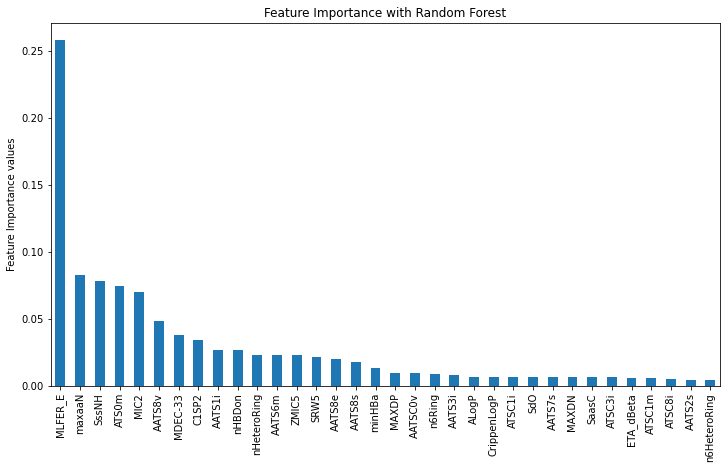

In [175]:
imp_feat_rf = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_feat_rf[:].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.show()

In [20]:
feature_idx = sorted(range(len(clf.feature_importances_)), key=lambda k: clf.feature_importances_[k],reverse=True)
n_feature = 6
print(feature_idx[:n_feature])
feature_selected = []
for i in (feature_idx[:n_feature]) :
    feature_selected.append(feature[i])
print(feature_selected)
feature_importance = []

for x in zip(feature, clf.feature_importances_):
    if x[0] in feature_selected :
        feature_importance.append([x[0],x[1]])
feature_importance

[29, 26, 21, 1, 3, 18]
['MLFER_E', 'MIC2', 'maxaaN', 'ATS0m', 'AATS8v', 'SssNH']


[['ATS0m', 0.07478246599785363],
 ['AATS8v', 0.05619076827302388],
 ['SssNH', 0.05421079367864278],
 ['maxaaN', 0.07601538772178194],
 ['MIC2', 0.08654326883142271],
 ['MLFER_E', 0.25576746761230656]]

ValueError: Length of passed values is 6, index implies 34.

In [177]:
data = data_train.loc[:,[x for x in feature_selected]]
correlation = data.corr()
correlation

,n6HeteroRing,AATS2s,ATSC8i,ATSC1m,ETA_dBeta,ATSC3i
n6HeteroRing,1.000000,-0.158656,0.067470,0.141402,-0.253308,0.009314
AATS2s,-0.158656,1.000000,0.145636,0.157602,0.410253,-0.194712
ATSC8i,0.067470,0.145636,1.000000,0.244217,-0.011251,-0.058452
ATSC1m,0.141402,0.157602,0.244217,1.000000,-0.023664,-0.135631
ETA_dBeta,-0.253308,0.410253,-0.011251,-0.023664,1.000000,-0.059380
ATSC3i,0.009314,-0.194712,-0.058452,-0.135631,-0.059380,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

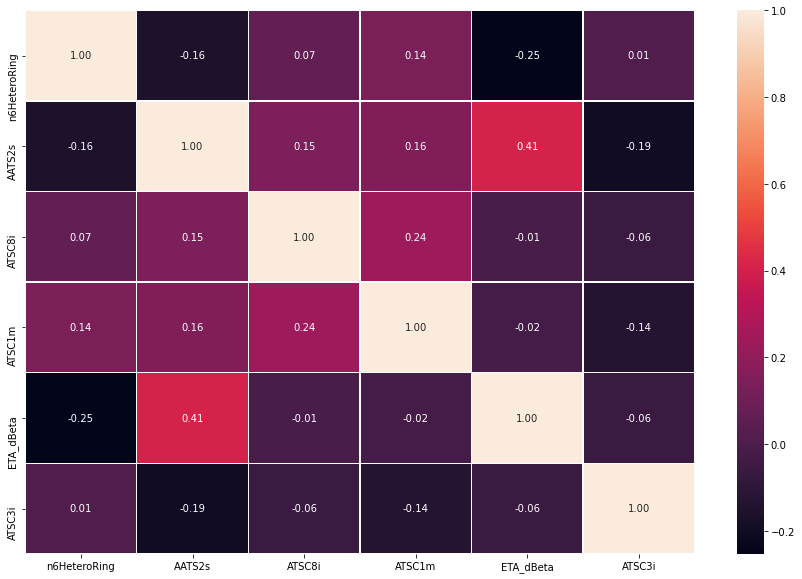

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation, annot=True, linewidths=.5, fmt='.2f', ax=ax)
plt.show

In [179]:


# Train the new classifier on the new dataset containing the most important features
X_important_train = data_train_fitur.loc[:,feature_selected]
y_train = data_train_label
X_important_test = data_test_fitur.loc[:,feature_selected]
y_test = data_test_label




## Model 1(Default Params)

In [201]:
import time
from sklearn.metrics import recall_score
start_time = time.time()
#params = model_xgboost.best_params_
params = {"n_estimators" : [2,10],"max_depth" : [3,5],"learning_rate" :[0.3,0.5]}
print(params)
cv = KFold(n_splits=10, random_state=42, shuffle=False)
acc_train = []
acc_test = []
for i in range(2) :
    model = XGBClassifier(n_estimators = params["n_estimators"][i], max_depth = params["max_depth"][i], learning_rate = params["learning_rate"][i])
    model.fit(X_important_train,y_train)
    y_pred_train = model.predict(X_important_train)
    score = cross_val_score(clf, X_important_train, y_train, cv=5,verbose=0)
    acc_train.append([score.mean(),recall_score(y_pred_train,y_train)])
    #print(len(X_important_test))
    y_p =model.predict(X_important_test)
    print(len(y_test))
    print(accuracy_score(y_p,y_test))
    acc_test.append([accuracy_score(y_p,y_test),recall_score(y_p,y_test)])
    #print(score.mean())
    

print("--- %s seconds ---" % (time.time() - start_time))



{'n_estimators': [2, 10], 'max_depth': [3, 5], 'learning_rate': [0.3, 0.5]}
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1

In [202]:
print(acc_train)
for i in range(2) :
    print("Parameter")
    for x in params.keys():
        print(x,"=",params[x][i])
    print("akurasi train",i+1,"= ", acc_train[i][0])
    print("recall validasi",i+1,"= ", acc_train[i][1])
    print("akurasi test",i+1,"= ", acc_test[i][0])
    print("recall test",i+1,"= ", acc_test[i][1])
    print("\n")

[[0.8493364794714487, 0.7782909930715936], [0.8499386503067485, 0.9270440251572327]]
Parameter
n_estimators = 2
max_depth = 3
learning_rate = 0.3
akurasi train 1 =  0.8493364794714487
recall validasi 1 =  0.7782909930715936
akurasi test 1 =  0.7948350071736011
recall test 1 =  0.784741144414169


Parameter
n_estimators = 10
max_depth = 5
learning_rate = 0.5
akurasi train 2 =  0.8499386503067485
recall validasi 2 =  0.9270440251572327
akurasi test 2 =  0.8507890961262554
recall test 2 =  0.8712574850299402




# ---- Batas ----

In [203]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 10)
model.fit(X_important_train,y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [204]:
from sklearn.model_selection import cross_val_score
import time
start_time = time.time()

y_pred_train = model.predict(X_important_train)
score = cross_val_score(clf, X_important_train, y_train, cv=5)

y_pred_test = model.predict(X_important_test)
print(accuracy_score(y_pred_test,y_test))
print(score.mean())
 
print("--- %s seconds ---" % (time.time() - start_time))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [183]:
print(len(y_test))


697


In [184]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=42, shuffle=False)
print(type(y_train))

X = X_important_train
y = y_train
print(X.shape)
#print(y_train)
#print(y.shape)
sc = []
for train_index, test_index in cv.split(X):
    X_test_k, y_test_k = X.iloc[test_index,:] , y.iloc[test_index]
    X_train_k, y_train_k = X.iloc[train_index,:] , y.iloc[train_index]
    model.fit(X_train_k,y_train_k)
    y_pred_k = model.predict(X_test_k)
    sc.append(accuracy_score(y_pred_k,y_test_k))
    print("akurasi test = ", accuracy_score(y_pred_k,y_test_k))
print(np.mean(sc))
scor = cross_val_score(model,X,y,cv=cv)
print(scor.mean())

<class 'pandas.core.series.Series'>
(1626, 6)
akurasi test =  0.8220858895705522
akurasi test = 0.7938461538461539
akurasi test =  0.8615384615384616
akurasi test =  0.8307692307692308
akurasi test =  0.8215384615384616
0.825955639452572
0.825955639452572


In [185]:
print(len(y_test))

697


In [127]:
print(model_xgboost.best_params_)

{'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.4}


In [125]:
from sklearn.model_selection import RandomizedSearchCV

cv = KFold(n_splits=10, random_state=42, shuffle=False)

parameters = {"learning_rate": [0.1, 0.01, 0.001, 0.2, 0.3 , 0.4 , 0.5],
               #"gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10, 16],
               "n_estimators": [100, 250, 500, 1000]}

# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(model, param_distributions = parameters, scoring = "accuracy",
                             cv = cv, verbose = 0, random_state = 40)

# Fit the model
model_xgboost = xgb_rscv.fit(X_train_k, y_train_k)
print(model_xgboost.best_params_)

{'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.4}


In [169]:
"""cv = KFold(n_splits=10, random_state=42, shuffle=False)

params = {"learning_rate": [0.1, 0.2, 0.3 , 0.4 , 0.5],
               #"gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10, 16],
               "n_estimators": [10,100, 250, 500, 1000]}
best_params = []
for i in range(5):
    model = XGBClassifier(n_estimators = params["n_estimators"][i], max_depth = params["max_depth"][i], learning_rate = params["learning_rate"][i])
    model.fit(X_important_train,y_train)
    score = cross_val_score(model,X_important_train,y_train,cv=cv)
    best_params.append([])
"""

'cv = KFold(n_splits=10, random_state=42, shuffle=False)\n\nparams = {"learning_rate": [0.1, 0.2, 0.3 , 0.4 , 0.5],\n               #"gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],\n               "max_depth": [2, 4, 7, 10, 16],\n               "n_estimators": [10,100, 250, 500, 1000]}\nbest_params = []\nfor i in range(5):\n    model = XGBClassifier(n_estimators = params["n_estimators"][i], max_depth = params["max_depth"][i], learning_rate = params["learning_rate"][i])\n    model.fit(X_important_train,y_train)\n    score = cross_val_score(model,X_important_train,y_train,cv=cv)\n    best_params.append([])\n'

In [15]:
y_pred_train = clf_important.predict(X_important_train)
accuracy_score(y_train, y_pred_train)

1.0

In [14]:
from sklearn.metrics import accuracy_score


clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y_train)
y_pred = clf_important.predict(X_important_test)
accuracy_score(y_test, y_pred)

0.8522238163558106

In [33]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
cv = KFold(n_splits=10, random_state=42, shuffle=False)
X = X_important_train.to_numpy()
X = np.array(X)
y = y_train
y = np.array(y)
print(X)
for i_train, j_test in cv.split(X):
    train_index = []
    test_index = []

    for i in i_train :
        train_index.append(i)
    for i in j_test :
        test_index.append(i)
        
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    print(len(train_index))
    #X_train,y_train = X[train_index],y[train_index]
    X_Test , y_test = X[test_index],y[test_index]
    print(X_train)
    #model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
    #scores.append(accuracy_score(y_pred,y_test))
#print(scores)

08, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 9

In [197]:
list_a = [0,1,2,3,4,5]

list_a[-3:-1]

[3, 4]

In [255]:
cv = KFold(n_splits=10, random_state=42, shuffle=False)
print(cv)
k_fold = 4
train_fitur = data_train_fitur.loc[:20,feature_selected] 
train_label = y_train
#print(train_label.iloc[:].shape)

n_data = train_fitur.loc[:20,:].shape[0]
start = 0
step = n_data//k_fold
end = step
#print(end)
for i in range(k_fold) :
    X_test, y_test = train_fitur.loc[start:end,feature_selected] , train_fitur.iloc[start:end]
    X_train, y_train = train_fitur.loc[end:,feature_selected] , train_fitur.iloc[end:]
    print(start,end)
    start = end
    end = start + step
    print("K",i)    
    print(y_test)    
    print(y_train)
    #print(len(X_test),len(X_train))

KFold(n_splits=10, random_state=42, shuffle=False)
0 5
K 0
      ATSC8i  n6HeteroRing   ALogP      ATSC1m    AATS7s
0   3.665693           1.0 -0.9195   10.143350  3.060185
1 -14.913076           0.0  0.4614  227.694609  1.925086
2 -15.128616           0.0  0.5112   15.993973  3.059524
3  21.492683           2.0 -1.4450  138.131207  2.398794
4   8.420096           0.0 -2.5272  355.631532  3.223584
       ATSC8i  n6HeteroRing   ALogP      ATSC1m    AATS7s
5    1.648183           1.0 -0.8845  218.276296  2.968450
6   25.722061           1.0 -0.6824  110.083927  2.214815
7    7.967441           0.0 -0.7282  -32.406581  3.743590
8   19.871346           0.0  0.4224   78.552543  3.626503
9  -11.016873           1.0 -1.2126   24.798538  4.031963
10   5.020188           0.0 -2.2514  371.125888  3.937483
11 -13.121557           0.0  0.3519   -9.461032  3.583333
12  -3.908630           0.0  0.5380  -66.507820  3.295086
13  -4.922489           0.0  1.1303   46.511581  1.948948
14  -2.052518      

In [52]:
sfm = SelectFromModel(clf, threshold=0.015)
# Train the selector
sfm.fit(X_train, y_train)
len(sfm.get_support())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


34

In [53]:
"""feature_selected = []
for feature_list_index in sfm.get_support(indices=True):
    #print(feature_list_index)
    #print(feature[feature_list_index])
    feature_selected.append(feature[feature_list_index])"""

data = data_train.loc[:,[x for x in feature_selected]]
correlation = data.corr()
correlation

,n6HeteroRing,ATSC8i,AATS2s,AATS7s,ATSC1i
n6HeteroRing,1.000000,0.067470,-0.158656,-0.077016,-0.633957
ATSC8i,0.067470,1.000000,0.145636,0.101113,-0.177527
AATS2s,-0.158656,0.145636,1.000000,0.698409,0.202387
AATS7s,-0.077016,0.101113,0.698409,1.000000,0.152548
ATSC1i,-0.633957,-0.177527,0.202387,0.152548,1.000000


In [75]:
y_important_pred = clf_important.predict(X_important_train)
#print(X_important_train)
accuracy_score(y_train, y_important_pred)

[[2.58893443e+03 4.81581174e+01 1.78551366e+02 ... 1.31037070e+00
  1.98500000e+00 1.00000000e+00]
 [5.63410301e+03 9.42015312e+01 1.96140696e+02 ... 3.38316237e+00
  2.06000000e+00 2.00000000e+00]
 [2.83438683e+03 4.26373393e+01 1.68834145e+02 ... 8.25020562e+00
  1.85700000e+00 0.00000000e+00]
 ...
 [2.31266543e+03 5.53522955e+01 8.44899028e+01 ... 1.10520945e+00
  1.14000000e+00 1.00000000e+00]
 [1.15635341e+04 7.57993393e+01 1.77333851e+02 ... 5.51134881e+00
  3.33200000e+00 1.00000000e+00]
 [4.04764088e+03 8.22946928e+01 1.24140446e+02 ... 6.12046394e+00
  2.09800000e+00 1.00000000e+00]]


1.0

In [55]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [65]:
def predict(X,y) :
    y_pred_test_model_1 = model_1.predict(X)
    con_matrix = confusion_matrix(y_pred_test_model_1, y)
    accuracy = accuracy_score(y_pred_test_model_1,y)
    tp, fp, fn, tn = con_matrix.ravel()
    print(con_matrix)
    print(tp, fp, fn, tn)
    precision = tp/(tp+fp)
    print("precision = ", precision)
    recall = tp/(tp+fn)
    print("recall = ", recall)
    f1 = (2*recall*precision)/(recall+precision)
    print("f1 = ",f1)
    result = {"matrix":con_matrix,"precision":precision,"recall":recall,"f1":f1,"accuracy":accuracy}
    return result

predict(X_important_test,y_test)["matrix"]


[[335  13]
 [ 10 339]]
335 13 10 339
precision =  0.9626436781609196
recall =  0.9710144927536232
f1 =  0.9668109668109667


array([[335,  13],
       [ 10, 339]], dtype=int64)

In [66]:
from xgboost import XGBClassifier

model_1 = XGBClassifier()

model_1.fit(X_important_train,y_train)

y_pred_train_model_1 = model_1.predict(X_important_train)

accuracy_score(y_pred_train_model_1,y_train)

1.0

In [67]:
from xgboost import XGBClassifier

n_model = 2
tuning = {"learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
        "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ]
}

#print(tuning)
pred= []
"""
for i in range(n_model) :
    model = XGBClassifier(n_estimators = tuning['n_est'][i],learning_rate = tuning['l_rate'][i],max_depth=tuning['max_depth'][i])
    #print(model)
    print(model)
    print(tuning['n_est'][i])
    model.fit(X_important_train,y_train)
    pred.append(predict(X_important_test,y_test))"""
i = 1
model = XGBClassifier(n_estimators = tuning['n_est'][i],learning_rate = tuning['l_rate'][i],max_depth=tuning['max_depth'][i])
model.fit(X_important_train,y_train)
y_pred_test = model.predict(X_important_test)
#print(y_pred_test)
con_matrix = confusion_matrix(y_pred_test, y_test)
print(con_matrix)

KeyError: 'n_est'

In [68]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [10],
  }
]
# Define cross validation
kfold = KFold(n_splits=10, random_state=42)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)
# Fit grid search
model = grid.fit(X_train, y_train)

NameError: name 'pipe' is not defined

In [ ]:
print(pred)

In [ ]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_pred_train_model_1, y_train)

tp, fp, fn, tn = con_matrix.ravel()

print(con_matrix)
print(tp, fp, fn, tn)
precision = tp/(tp+fp)
print("precision = ", precision)

recall = tp/(tp+fn)
print("recall = ", recall)

f1 = (2*recall*precision)/(recall+precision)
print("f1 = ",f1)
